In [1]:
import sorting.sort as sort
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 1000

data = {}
data['low'] = []
data['high'] = []
data['range'] = []
data['size'] = []
data['merge_time'] = []
data['count_time'] = []
data['comb_time'] = []
data['shell_time'] = []
data['heap_time'] = []
data['binary_insertion_time'] = []

for _ in range(N):
    array_range = np.random.randint(0, 10000, 2)

    low = min(array_range)
    data['low'].append(low)
    
    high = max(array_range)
    data['high'].append(high)
    
    data['range'].append(high - low)
    
    n = np.random.randint(10, 5000)
    data['size'].append(n)
    
    # Generate an array to be sorted
    a1 = np.random.randint(low=low, high=high, size=n)
    a2 = a1.copy()
    a3 = a1.copy()
    a4 = a1.copy()
    a5 = a1.copy()
    a6 = list(a1.copy())
    
    # Calculate times for each sorting algorithm
    merge_time = sort.performance(algorithm=sort.merge_sort, data=a1)
    count_time = sort.performance(algorithm=sort.count_sort, data=a2)
    comb_time = sort.performance(algorithm=sort.comb_sort, data=a3)
    shell_time = sort.performance(algorithm=sort.shell_sort, data=a4)
    heap_time = sort.performance(algorithm=sort.heap_sort, data=a5)
    binary_insertion_time = sort.performance(algorithm=sort.binary_insertion_sort, data=a6)
    
    # Add collected time to the 'data' dictionary
    data['merge_time'].append(merge_time)
    data['count_time'].append(count_time)
    data['comb_time'].append(comb_time)
    data['shell_time'].append(shell_time)
    data['heap_time'].append(heap_time)
    data['binary_insertion_time'].append(binary_insertion_time)

df = pd.DataFrame.from_dict(data)
result = df.sort_values(['size', 'range'], ascending=[1, 1])
result.to_csv('../data/sorting_data.csv', index=False)

### Data Description

The data has as input (l, k, n) where:
    -  l is the lower bound of the list
    -  k is the range of the list
    -  n is the length of the list
    
The data has as output (count, merge) where:
    -  count is a length of time (ms)
    -  merge is a length of time (ms)

Merge Average: 24.19 ms
Count Average: 2.63 ms


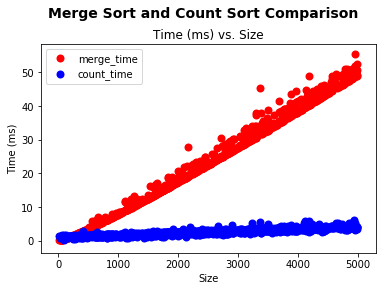

In [13]:
import matplotlib.pyplot as plt

% matplotlib inline

fig = plt.figure()
fig.suptitle('Merge Sort and Count Sort Comparison', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Time (ms) vs. Size')

ax.set_xlabel('Size')
ax.set_ylabel('Time (ms)')

merge_avg = result['merge_time'].mean()
count_avg = result['count_time'].mean()

merge_text = "Merge Average: {0:.2f} ms\n".format(merge_avg)
count_text = "Count Average: {0:.2f} ms".format(count_avg)

print(merge_text + count_text)

# Create the plot
plt.scatter('size', 'merge_time', data=result, marker='o', color='red', linewidth=2)
plt.scatter('size', 'count_time', data=result, marker='o', color='blue', linewidth=2)
plt.legend()
plt.savefig('../plots/merge_count_comparison.png')

Comb Average: 23.72 ms
Shell Average: 16.38 ms


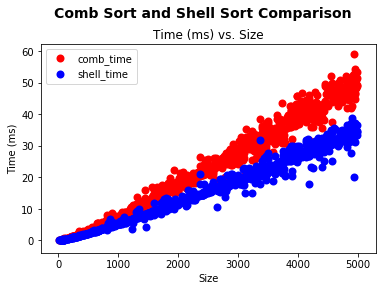

In [12]:
% matplotlib inline

fig = plt.figure()
fig.suptitle('Comb Sort and Shell Sort Comparison', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Time (ms) vs. Size')

ax.set_xlabel('Size')
ax.set_ylabel('Time (ms)')

comb_avg = result['comb_time'].mean()
shell_avg = result['shell_time'].mean()

comb_text = "Comb Average: {0:.2f} ms\n".format(comb_avg)
shell_text = "Shell Average: {0:.2f} ms".format(shell_avg)

print(comb_text + shell_text)

# Create the plot
plt.scatter('size', 'comb_time', data=result, marker='o', color='red', linewidth=2)
plt.scatter('size', 'shell_time', data=result, marker='o', color='blue', linewidth=2)
plt.legend()
plt.savefig('../plots/comb_shell_comparison.png')

Heap Average: 32.03 ms
Binary Insertion Average: 98.22 ms


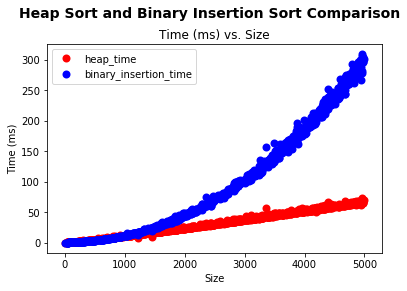

In [11]:
% matplotlib inline

fig = plt.figure()
fig.suptitle('Heap Sort and Binary Insertion Sort Comparison', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Time (ms) vs. Size')
ax.set_xlabel('Size')
ax.set_ylabel('Time (ms)')

heap_avg = result['heap_time'].mean()
binary_insertion_avg = result['binary_insertion_time'].mean()

heap_text = "Heap Average: {0:.2f} ms\n".format(heap_avg)
binary_insertion_text = "Binary Insertion Average: {0:.2f} ms".format(binary_insertion_avg)

print(heap_text + binary_insertion_text)

# Create the plot
plt.scatter('size', 'heap_time', data=result, marker='o', color='red', linewidth=2)
plt.scatter('size', 'binary_insertion_time', data=result, marker='o', color='blue', linewidth=2)
plt.legend()
plt.savefig('../plots/heap_bin_comparison.png')

In [7]:
result = pd.read_csv('../data/sorting_data.csv')

data = {}
data['size'] = []
data['merge_time'] = []
data['count_time'] = []
data['comb_time'] = []
data['shell_time'] = []
data['heap_time'] = []
data['binary_insertion_time'] = []

for i in range(5000):
    df = result[result['size'] == i]
    if not df.empty:
        data['size'].append(i)
        data['merge_time'].append(df['merge_time'].mean())
        data['count_time'].append(df['count_time'].mean())
        data['comb_time'].append(df['comb_time'].mean())
        data['shell_time'].append(df['shell_time'].mean())
        data['heap_time'].append(df['heap_time'].mean())
        data['binary_insertion_time'].append(df['binary_insertion_time'].mean())
df = pd.DataFrame.from_dict(data)
df.to_csv('../data/results_data.csv', index=False)
        
    

In [8]:
df

,size,merge_time,count_time,comb_time,shell_time,heap_time,binary_insertion_time
0,13,0.049114,1.348972,0.032902,0.020981,0.043869,0.024796
1,34,0.133753,0.678062,0.107050,0.069857,0.162125,0.075102
2,42,0.180960,1.348972,0.131130,0.098228,0.212908,0.105381
3,46,0.199080,1.128912,0.177860,0.104904,0.246048,0.111818
4,49,0.212908,1.394987,0.178099,0.114202,0.262022,0.120163
5,52,0.229836,1.422167,0.169992,0.107050,0.287056,0.130177
6,56,0.252962,1.791954,0.259161,0.292778,0.378132,0.154018
7,57,0.265121,0.995874,0.197172,0.140905,0.319958,0.148296
8,68,0.316858,0.630856,0.267029,0.174046,0.392914,0.197172
9,69,0.348806,1.127958,0.282288,0.187874,0.433922,0.214100


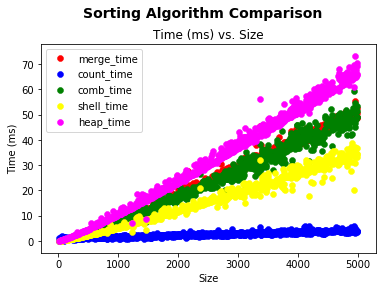

In [8]:
% matplotlib inline
def make_scatter_plot(frame, x_axis: str, keys: list):
    fig = plt.figure()
    fig.suptitle('Sorting Algorithm Comparison', fontsize=14, fontweight='bold')

    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)

    ax.set_title('Time (ms) vs. Size')
    ax.set_xlabel('Size')
    ax.set_ylabel('Time (ms)')
    # Create the plot
    for key in keys:
        plt.scatter(x_axis, key[0], data=frame, marker='o', color=key[1], linewidth=0.5)
    plt.legend()
    plt.savefig('../plots/sort_algorithm_comparison.png', index=False)
    
frame = pd.read_csv('../data/results_data.csv')
keys = [
    ('merge_time', 'red'),
    ('count_time', 'blue'),
    ('comb_time', 'green'),
    ('shell_time', 'yellow'),
    ('heap_time', 'magenta')
]
make_scatter_plot(frame, 'size', keys)